In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

# Load Data 
df = pd.read_csv("Alphabets_data.csv")

# Encode target
le = LabelEncoder()
df["letter"] = le.fit_transform(df["letter"])

# Split features and labels
X = df.drop("letter", axis=1)
y = df["letter"]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y)

#  ANN 
from keras.layers import Input

model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(len(np.unique(y)), activation='softmax')
])


model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

#  Evaluation 
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes, zero_division=0))
print("Accuracy:", accuracy_score(y_test, y_pred_classes))


Epoch 1/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3545 - loss: 2.4032 - val_accuracy: 0.7362 - val_loss: 0.9619
Epoch 2/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7464 - loss: 0.8978 - val_accuracy: 0.7962 - val_loss: 0.7182
Epoch 3/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8024 - loss: 0.6676 - val_accuracy: 0.8294 - val_loss: 0.5954
Epoch 4/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8360 - loss: 0.5664 - val_accuracy: 0.8528 - val_loss: 0.5079
Epoch 5/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8638 - loss: 0.4607 - val_accuracy: 0.8622 - val_loss: 0.4615
Epoch 6/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8793 - loss: 0.4172 - val_accuracy: 0.8781 - val_loss: 0.4177
Epoch 7/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8941 - loss: 0.3731 - val_accuracy: 0.8925 - val_loss: 0.3686
Epoch 8/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9034 - loss: 0.3271 - val_accuracy: 0.

In [4]:

# Data Exploration
print("Dataset shape:", df.shape)
print("Summary statistics:\n", df.describe())
print("Class distribution:\n", df['letter'].value_counts())


Dataset shape: (20000, 17)
Summary statistics:
              letter          xbox          ybox         width       height  \
count  20000.000000  20000.000000  20000.000000  20000.000000  20000.00000   
mean      12.516750      4.023550      7.035500      5.121850      5.37245   
std        7.502175      1.913212      3.304555      2.014573      2.26139   
min        0.000000      0.000000      0.000000      0.000000      0.00000   
25%        6.000000      3.000000      5.000000      4.000000      4.00000   
50%       13.000000      4.000000      7.000000      5.000000      6.00000   
75%       19.000000      5.000000      9.000000      6.000000      7.00000   
max       25.000000     15.000000     15.000000     15.000000     15.00000   

              onpix          xbar          ybar         x2bar         y2bar  \
count  20000.000000  20000.000000  20000.000000  20000.000000  20000.000000   
mean       3.505850      6.897600      7.500450      4.628600      5.178650   
std        2

In [6]:

# Check for Missing Values
print("Missing values in each column:\n", df.isnull().sum())

# Optional: Drop missing values (uncomment if needed)
# df = df.dropna()


Missing values in each column:
 letter    0
xbox      0
ybox      0
width     0
height    0
onpix     0
xbar      0
ybar      0
x2bar     0
y2bar     0
xybar     0
x2ybar    0
xy2bar    0
xedge     0
xedgey    0
yedge     0
yedgex    0
dtype: int64


In [22]:
tuned_model = grid_result.best_estimator_
tuned_pred_classes = tuned_model.predict(X_test)

from sklearn.metrics import accuracy_score
print("Tuned Model Accuracy:", accuracy_score(y_test, tuned_pred_classes))


Tuned Model Accuracy: 0.9045


In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from scikeras.wrappers import KerasClassifier

# Load your dataset (adjust filename/path if needed)
df = pd.read_csv("Alphabets_data.csv")

# Prepare features and target
X = df.drop('letter', axis=1).values
y = LabelEncoder().fit_transform(df['letter'])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define model builder function
def build_model(optimizer='adam'):
    model = Sequential([
        Input(shape=(X_train.shape[1],)),
        Dense(64, activation='relu'),
        Dense(64, activation='relu'),
        Dense(len(np.unique(y)), activation='softmax')
    ])
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Create the scikeras wrapper
model_cv = KerasClassifier(model=build_model, verbose=0)

# Define hyperparameter grid
param_grid = {
    'model__optimizer': ['adam', 'rmsprop'],
    'batch_size': [32, 64],
    'epochs': [10, 20]
}

# Perform GridSearchCV
grid = GridSearchCV(estimator=model_cv, param_grid=param_grid, cv=3)
grid_result = grid.fit(X_train, y_train)

print("Best Parameters:", grid_result.best_params_)
print("Best Score:", grid_result.best_score_)

# Evaluate the tuned model on test data
tuned_model = grid_result.best_estimator_
y_pred = tuned_model.predict(X_test)

from sklearn.metrics import accuracy_score
print("Test Accuracy:", accuracy_score(y_test, y_pred))


Best Parameters: {'batch_size': 32, 'epochs': 20, 'model__optimizer': 'adam'}
Best Score: 0.8826249053389233
Test Accuracy: 0.904


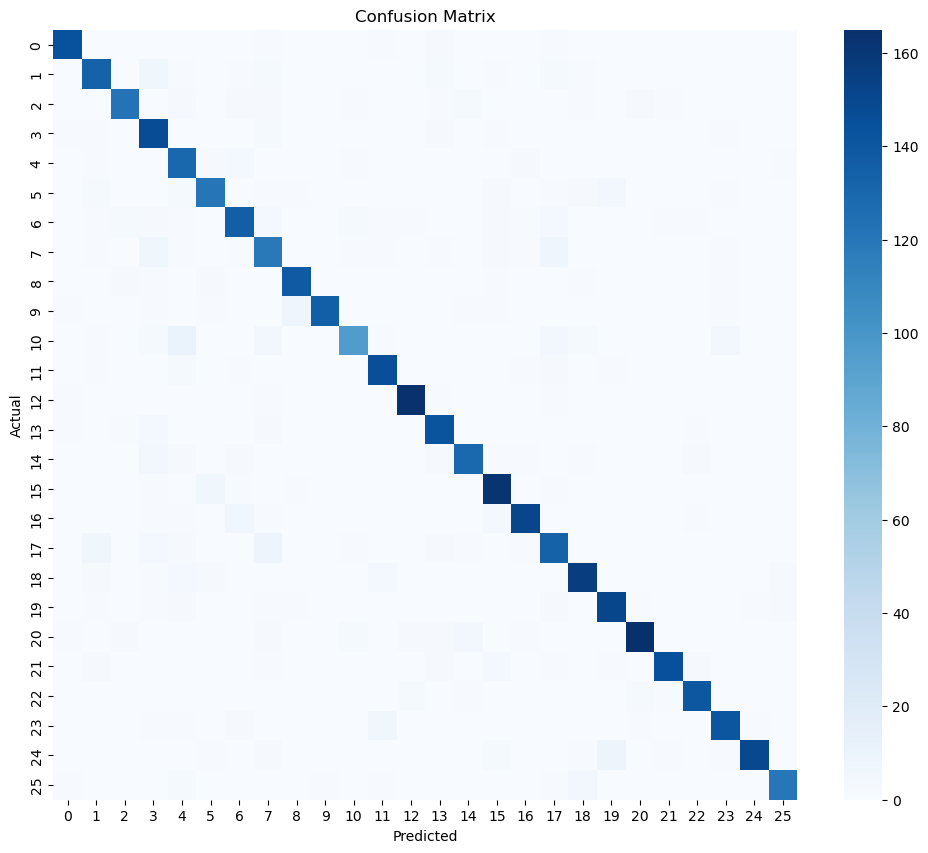

In [18]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)  # Use y_pred, not y_pred_classes
plt.figure(figsize=(12,10))
sns.heatmap(cm, annot=False, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [27]:
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.layers import Input

# Prepare the data
X = df.drop('letter', axis=1).values
y = LabelEncoder().fit_transform(df['letter'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model-building function
def build_model(optimizer='adam'):
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Input, Dense
    
    num_classes = len(np.unique(y_train))  # or set this as a global variable before
    
    model = Sequential([
        Input(shape=(X_train.shape[1],)),
        Dense(64, activation='relu'),
        Dense(64, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


# Wrap with KerasClassifier
model_cv = KerasClassifier(model=build_model, verbose=0)


# Define hyperparameter grid
param_grid = {
    'optimizer': ['adam', 'rmsprop'],
    'batch_size': [32, 64],
    'epochs': [10, 20]
}

# Perform grid search
grid = GridSearchCV(model_cv, param_grid, cv=3)
grid_result = grid.fit(X_train, y_train)

print("Best Parameters:", grid_result.best_params_)
print("Best Score:", grid_result.best_score_)


Best Parameters: {'batch_size': 32, 'epochs': 20, 'optimizer': 'adam'}
Best Score: 0.8901257139407358
